<a href="https://www.kaggle.com/code/janadarwish/nti-lap-11?scriptVersionId=264114081" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split , cross_val_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [3]:
data=pd.DataFrame(load_iris().data,columns=load_iris().feature_names)
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [4]:
data.isna().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64

In [5]:
data.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [6]:
data.corr()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
sepal length (cm),1.000000,-0.117570,0.871754,0.817941
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126
petal length (cm),0.871754,-0.428440,1.000000,0.962865
petal width (cm),0.817941,-0.366126,0.962865,1.000000


In [7]:
corr=data.corr()
corr

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
sepal length (cm),1.000000,-0.117570,0.871754,0.817941
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126
petal length (cm),0.871754,-0.428440,1.000000,0.962865
petal width (cm),0.817941,-0.366126,0.962865,1.000000


In [8]:
corr['petal width (cm)'].sort_values(ascending=False)

petal width (cm)     1.000000
petal length (cm)    0.962865
sepal length (cm)    0.817941
sepal width (cm)    -0.366126
Name: petal width (cm), dtype: float64

In [9]:
x=data.drop('petal width (cm)',axis=1)
y=data['petal width (cm)']


x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)


model=KNeighborsRegressor()

model.fit(x_train,y_train)

KNeighborsRegressor()

In [10]:
y_pred=model.predict(x_test)
print(r2_score(y_test,y_pred))
print(mean_squared_error(y_test,y_pred))
print(mean_absolute_error(y_test,y_pred))

0.9307591462881715
0.04401333333333334
0.14866666666666667


In [11]:
k_values=range(1,11)
results=[]
for k in k_values:
    model=KNeighborsRegressor(n_neighbors=k)
    model.fit(x_train,y_train)
    y_pred=model.predict(x_test)
    print(f'k={k},r2_score:{r2_score(y_test,y_pred)}')
    results.append(r2_score(y_test,y_pred))

k=1,r2_score:0.8982677550735024
k=2,r2_score:0.919243475676904
k=3,r2_score:0.9413845140916056
k=4,r2_score:0.9316978097851737
k=5,r2_score:0.9307591462881715
k=6,r2_score:0.9471528372575411
k=7,r2_score:0.9455380397190253
k=8,r2_score:0.9510102212938524
k=9,r2_score:0.9572328363252868
k=10,r2_score:0.9565225751192994


In [12]:
np.argmax(results) 

8

In [13]:
max(results)

0.9572328363252868

In [14]:
k_values=range(1,11)
results2=[]
for k in k_values:
    model=KNeighborsRegressor(n_neighbors=k)
    score=cross_val_score(model,x,y,cv=5)
    results2.append(score.mean())

In [15]:
max(results2)

0.38020973218329124

In [16]:
np.argmax(results2)

6

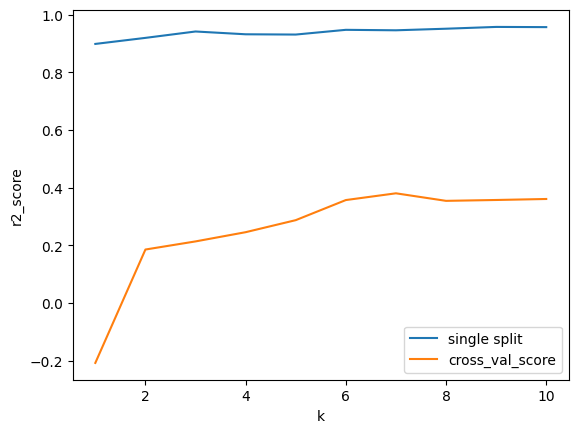

In [17]:
plt.plot(k_values,results,label='single split')
plt.plot(k_values,results2,label='cross_val_score')
plt.legend()
plt.xlabel('k')
plt.ylabel('r2_score')
plt.show()